# [1] Python for Statistics

# [1.3.2] Central Limit Theorem

**Prepared by:**

- Joshua Castillo
- Michael Adrian Javier
- Lanz Lagman

**Topics to cover:**

- Introduction to Central Limit Theorem

**Weekly Objectives:**

- Demonstration of Applications of the Central Limit Theorem

**References:**
- [(Ivezic, Connolly, Vanderplas, Gray) Statistics, Data Mining, and Machine Learning in Astronomy](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
- [(Vanderplas) Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [(DataCamp) Introduction to Statistics](https://www.datacamp.com/courses/introduction-to-statistics)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
titanic_df.head()
Class1st_df = titanic_df[titanic_df['class']=='First'].reset_index(drop=True)

## What is central limit theorem?

> The distribution of an $n$-number of mean samples approximates a Gaussian distribution the bigger the value of $n$ is. This is true regardless of the shape of the distribution.

- We can get n-samples per column or dataframe via the `sample()` method.
- The important arguments are:
    - `n`: number of samples to be obtained
    - `replace`: Allow or disallow sampling of the same row more than once.
    - `random_state`: seed for random number generator.

- Let's try to get 10 random samples from the `age` column of `Class1st_df`.

In [ ]:
Class1st_df['age'].sample(10, random_state=420)

186    36.0
42     38.0
91     36.0
150    61.0
110    35.0
69     18.0
20     23.0
145     NaN
19     71.0
0      38.0
Name: age, dtype: float64

- To demonstrate CLT, we do the following:
    - Get 100 samples, get the mean of these samples, do this 100 times.
    - Get 100 samples, get the mean of these samples, do this 1000 times.
    - Get 100 samples, get the mean of these samples, do this 10000 times.
- The initially empty list will be filled with 100, 1000, 10000 mean of samples for each loop.
- A histogram is produced for each loop, showing that as more loops are made, the closer the histograms look like Gaussian distributions.
- Compared to the population distribution, the distribution of the mean of samples are much larger.

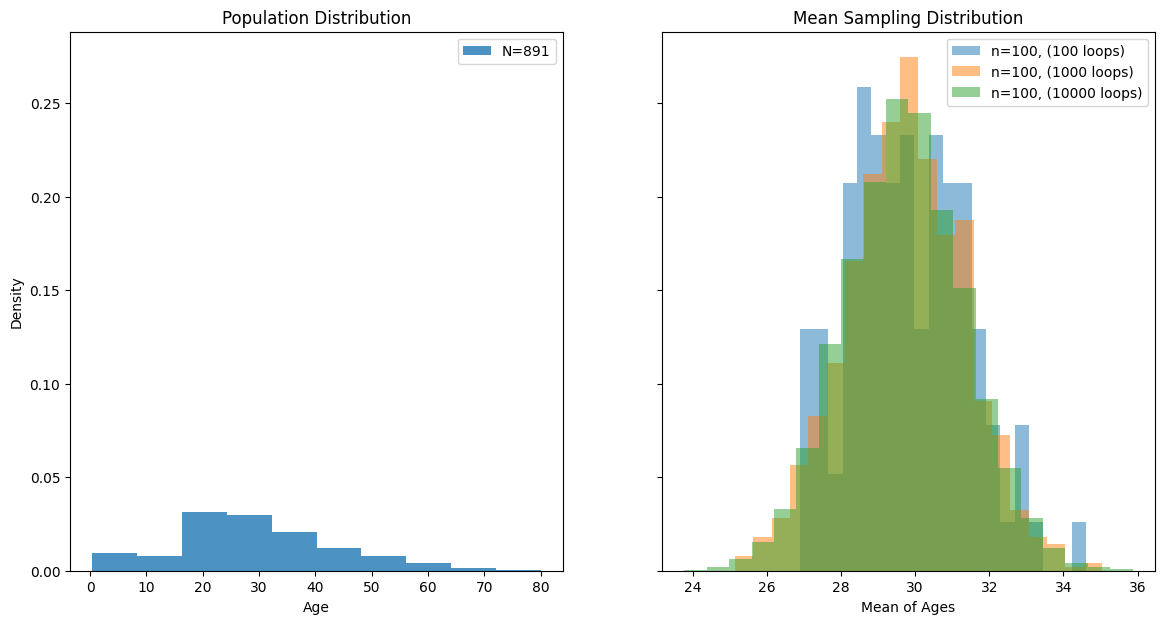

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)

ax[0].hist(titanic_df['age'], density=True, alpha=0.8, label=f"N={len(titanic_df['age'])}")
ax[0].set(title='Population Distribution', xlabel='Age', ylabel='Density')
ax[0].legend()
for n in [100,1000,10000]:

    np.random.seed(420)
    sample_means = []

    for i in range(n):
        samp = titanic_df['age'].sample(100, replace=True)
        sample_means.append(np.mean(samp))

    ax[1].hist(sample_means, label=f"n=100, ({n} loops)", bins=20, alpha=0.5, density=True);

ax[1].set(title='Mean Sampling Distribution', xlabel='Mean of Ages')
ax[1].legend()

### Another way of demonstrating CLT.

- The other way would focus on changing the number of samples instead of the number of loops previously.
    - Get 1 sample, get the mean of this sample, do this 10,000 times.
    - Get 2 sample, get the mean of these samples, do this 10,000 times.
    - Get 4 sample, get the mean of these samples, do this 10,000 times.
    - Get 8 sample, get the mean of these samples, do this 10,000 times.
- In this way, we can clearly see that just by changing the sample size only, the distribution of mean of samples become more Gaussian, and they're not that large compared to the population distribution unlike the previous demonstration.

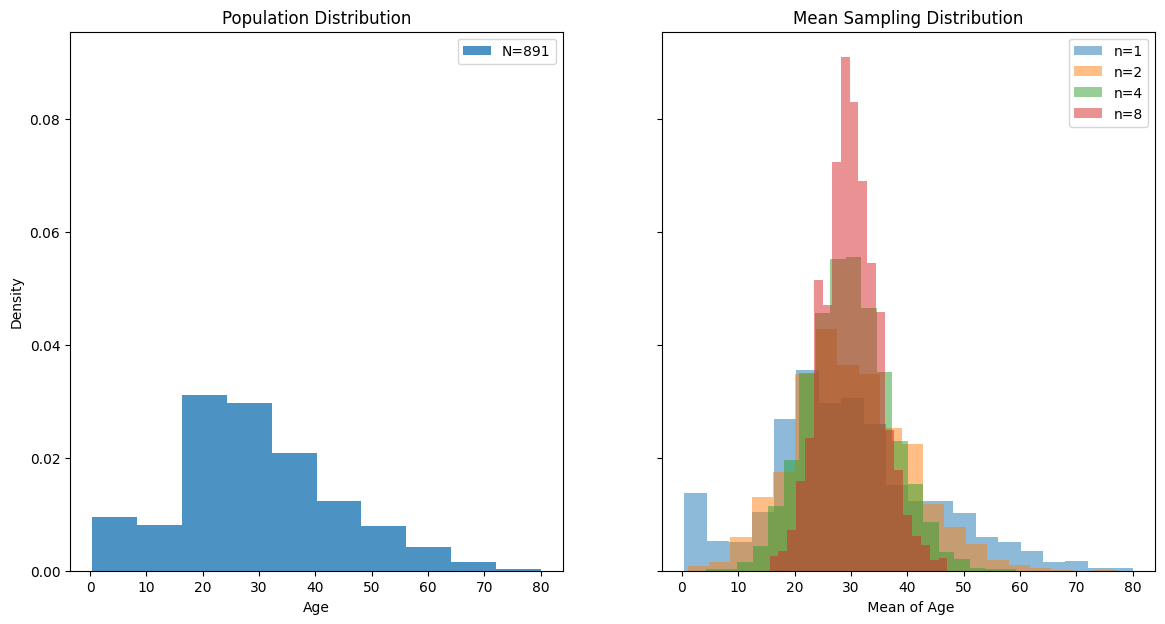

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,7), sharey=True)

ax[0].hist(titanic_df['age'], density=True, alpha=0.8, label=f"N={len(titanic_df['age'])}")
ax[0].set(title='Population Distribution', xlabel='Age', ylabel='Density')
ax[0].legend()

for n in [1,2,4,8]:

    np.random.seed(420)
    sample_means = []

    for i in range(10000):
        samp = np.random.choice(titanic_df['age'].values, n)
        sample_means.append(np.mean(samp))

    ax[1].hist(sample_means, label=f"n={n}", bins=20,
               #histtype='step',
               alpha=0.5,
               density=True);

ax[1].set(title='Mean Sampling Distribution', xlabel=' Mean of Age')
ax[1].legend()

- In the last section, we'll demonstrate that the CLT holds true regardless of the given distribution.
- We'll show this by creating a function `CLT_Demonstrator` based on these plots that take in any 1D distribution array and a list of n-samples to consider.
- The number of samples $n$ to consider, and $n$ itself, is arbitrary.
    - CLT could be observed already on some distributions by considering a set of integers less than 10.

## Sample exercises

1. Say that 800 UP students going to UP Health Service has a mean weight of 65 kg with a standard deviation of 7 kg. Calculate the probability that the mean weight of 200 UP students is between 50 and 55 kg. Compare this probability with 400 UP students.

  Hint: Use the z-score formula
$$ z = \frac{x - \mu}{\sigma/\sqrt{n}} $$

2. A typical McChicken has an average of 5g of mayonnaise with a standard deviation of 2g. Upon receiving your order, you notice immediately that your sandwich has an absurd amount of mayonnaise (see picture below). You find that its weight is roughly 30-32 grams.

<img src="https://i.imgur.com/Z5UV1qr.jpeg" width = 400 />

  If there are 6.5 million burgers sold at McDonald's a day, what is the probability that you get this kind of sandwich in a day? How about in a week?


### End of tutorial.

---